# A3.0 Classification

*by Chuck Anderson for [CS545: Machine Learning](https://www.cs.colostate.edu/~anderson/cs545) at Colorado State University*

In this assignment you will define a new class named `NeuralNetworkClassifier` that extends the given class `NeuralNetwork`.  Your new class will reuse most of the code in its parent class, but you will have to define the parts of the code that differ to allow the network to do classification. 

To learn a bit about how to call methods in a parent class, take a look at this
[introduction to inheritance](https://realpython.com/python-super/) and examples of using `super()`.

Start by downloading [A3code.zip](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A3code.zip).  Unzip this and you should see these files:

*  `mlutilities.py`
*  `neuralnetworks.py`
*  `optimizers.py`

If you just run `neuralnetworks.py` you should see the following result.

```
$ python neuralnetworks.py 
scg  [] use_torch=False RMSE 0.000 took 0.001 seconds
scg  [5, 5] use_torch=False RMSE 0.085 took 0.118 seconds
sgd  [5, 5] use_torch=False RMSE 0.246 took 0.053 seconds
adam [5, 5] use_torch=False RMSE 0.052 took 0.057 seconds
scg  [] use_torch=True RMSE 0.000 took 0.019 seconds
scg  [5, 5] use_torch=True RMSE 0.008 took 6.682 seconds
sgd  [5, 5] use_torch=True RMSE 0.026 took 2.349 seconds
adam [5, 5] use_torch=True RMSE 0.017 took 2.352 seconds
```

# Changes Required

The first line of your new class definition will be

```
   .
   .
   .
import neuralnetworks as nn

class NeuralNetworkClassifier(nn.NeuralNetwork):
   .
   .
   .```

Only one change is required in the arguments for all functions, and the change is in the constructor arguments.  The constructor must be dchanged from how it is defined in the `NeuralNetwork` class
```
    def __init__(self, n_inputs, n_hiddens_list, n_outputs, use_torch=False):
```
to
```
    def __init__(self, n_inputs, n_hiddens_list, classes, use_torch=False):
```
where ```classes``` is just a list of class integer names, like `[1, 2, 3]`.

The only methods that you will have to include in your new `NeuralNetworkClassifier` are
```
__init__
__repr__
_standardizeT
_unstandardizeT
_forward_pass
_objectiveF
_objective_to_actual
train
use
```

You may introduce new methods that these use, such as
```
_make_indicator_variables```

## Definition of `NeuralNetworkClassifier`

Here is a start at defining your new class.  This bit of code includes everything you will need in the constructor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import sys

import torch
import mlutilities as ml  # for ml.draw
import optimizers as opt  # for opt.sgd, opt.adam, and opt.scg

import neuralnetworks as nn

# Extend the nn.NeuralNetwork class to reuse much of its implementation
# Only those methods that must be altered to do classification are defined in NeuralNetworkClassifier

class NeuralNetworkClassifier(nn.NeuralNetwork):

    # Constructor
    def __init__(self, n_inputs, n_hiddens_list, classes, use_torch=False):

        # Force n_hidens_list to be a list
        
        if not isinstance(n_hiddens_list, list):
            raise Exception('NeuralNetworkClassifier: n_hiddens_list must be a list.')
 
        # Call the constructor for NeuralNetwork, passing in the number of unique class names (ints)
        # as the number of outputs
        
        super().__init__(n_inputs, n_hiddens_list, len(classes), use_torch)

        # Store as member variables other things needed by instances of this class.
        
        self.classes = np.array(classes) # to allow argmax in use()
        
        if use_torch:
            self.log = torch.log
            self.exp = torch.exp
        else:
            self.log = np.log
            self.exp = np.exp
        

# insert the rest of your class methods here.

## Example Tests

Here are some tests of your code and what the results should show.  First the original `NeuralNetwork` class methods are called then the new ones you define in `NeuralNetworkClassifier`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import neuralnetworks as nn

Here is some toy data.  Input samples have two components, and all values are from 0 to 1.9.  Two targets are defined. The first is the square of of the first input component.  The second is the sine of the second component.

In [3]:
X = np.arange(20).reshape((10, 2)) * 0.1
T = np.hstack((X[:, 0:1]**2, np.sin(X[:, 1:2])))
X.shape, T.shape

((10, 2), (10, 2))

In [4]:
X

array([[0. , 0.1],
       [0.2, 0.3],
       [0.4, 0.5],
       [0.6, 0.7],
       [0.8, 0.9],
       [1. , 1.1],
       [1.2, 1.3],
       [1.4, 1.5],
       [1.6, 1.7],
       [1.8, 1.9]])

In [5]:
T

array([[0.        , 0.09983342],
       [0.04      , 0.29552021],
       [0.16      , 0.47942554],
       [0.36      , 0.64421769],
       [0.64      , 0.78332691],
       [1.        , 0.89120736],
       [1.44      , 0.96355819],
       [1.96      , 0.99749499],
       [2.56      , 0.99166481],
       [3.24      , 0.94630009]])

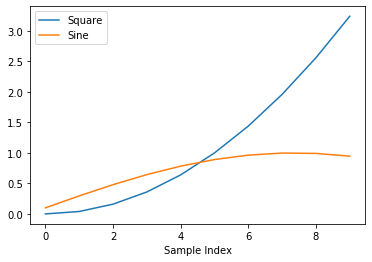

In [6]:
plt.plot(T)
plt.xlabel('Sample Index')
plt.legend(['Square', 'Sine']);

In [7]:
nnet = nn.NeuralNetwork(2, [10, 10], 2)
nnet

NeuralNetwork(2, [10, 10], 2, use_torch=False)  Network is not trained.

In [8]:
nnet.train(X, T, 50, method='scg')
nnet

NeuralNetwork(2, [10, 10], 2, use_torch=False)
   Network was trained for 50 epochs that took 0.0398 seconds. Final objective value is 0.350

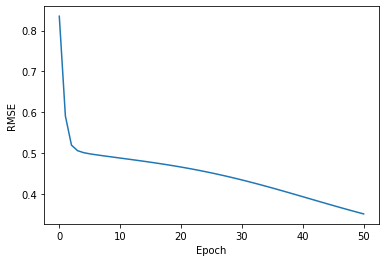

In [9]:
plt.plot(nnet.get_error_trace())
plt.xlabel('Epoch')
plt.ylabel('RMSE');

In [10]:
nnet

NeuralNetwork(2, [10, 10], 2, use_torch=False)
   Network was trained for 50 epochs that took 0.0398 seconds. Final objective value is 0.350

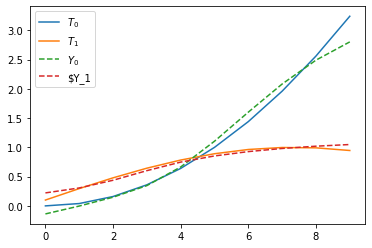

In [11]:
Y = nnet.use(X)
plt.plot(T)
plt.plot(Y, '--')
plt.legend(['$T_0$', '$T_1$', '$Y_0$', '$Y_1']);

Now with SGD.

NeuralNetwork(2, [10, 10], 2, use_torch=False)
   Network was trained for 50 epochs that took 0.0192 seconds. Final objective value is 0.468


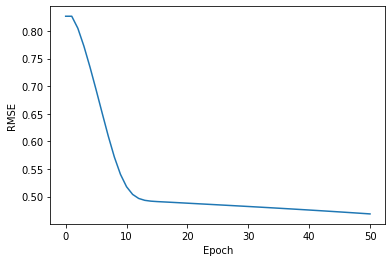

In [12]:
nnet = nn.NeuralNetwork(2, [10, 10], 2)
nnet.train(X, T, 50, method='sgd', learning_rate=0.1, momentum_rate=0.5)
print(nnet)
plt.plot(nnet.get_error_trace())
plt.xlabel('Epoch')
plt.ylabel('RMSE');

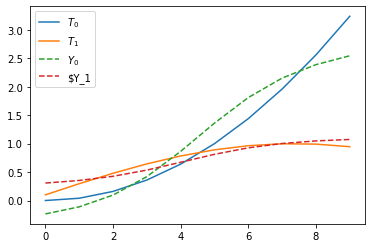

In [13]:
Y = nnet.use(X)
plt.plot(T)
plt.plot(Y, '--')
plt.legend(['$T_0$', '$T_1$', '$Y_0$', '$Y_1']);

and with Adam

NeuralNetwork(2, [10, 10], 2, use_torch=False)
   Network was trained for 50 epochs that took 0.0251 seconds. Final objective value is 0.163


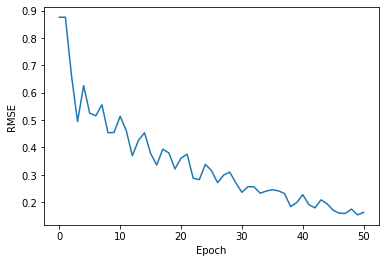

In [14]:
nnet = nn.NeuralNetwork(2, [10, 10], 2)
nnet.train(X, T, 50, method='adam', learning_rate=0.1)
print(nnet)
plt.plot(nnet.get_error_trace())
plt.xlabel('Epoch')
plt.ylabel('RMSE');

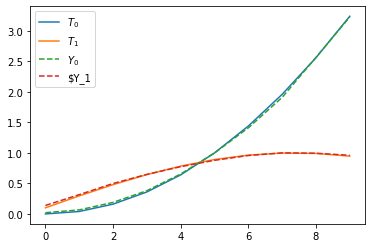

In [15]:
Y = nnet.use(X)
plt.plot(T)
plt.plot(Y, '--')
plt.legend(['$T_0$', '$T_1$', '$Y_0$', '$Y_1']);

To test the use of pytorch, add `use_torch=True` to the constructor.

NeuralNetwork(2, [10, 10], 2, use_torch=True)
   Network was trained for 50 epochs that took 0.1776 seconds. Final objective value is 0.192


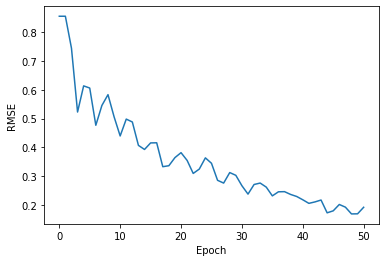

In [16]:
nnet = nn.NeuralNetwork(2, [10, 10], 2, use_torch=True)
nnet.train(X, T, 50, method='adam', learning_rate=0.1)
print(nnet)
plt.plot(nnet.get_error_trace())
plt.xlabel('Epoch')
plt.ylabel('RMSE');

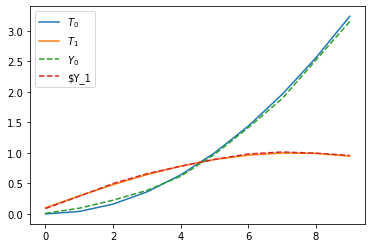

In [17]:
Y = nnet.use(X)
plt.plot(T)
plt.plot(Y, '--')
plt.legend(['$T_0$', '$T_1$', '$Y_0$', '$Y_1']);

Now for some tests on the individual new class methods.  First we create some toy classification data.  Each sample has two inputs, randomly chosen from integers 0, 1, and 2.  Target class is 1 if the two input samples are equal, 0 if they are not.

In [25]:
n_samples = 20
X = np.random.choice(3, (n_samples, 2))
T = (X[:, 0:1] == X[:, 1:2]).astype(int)  # where the two inputs are equal
classes = [0, 1]

for x, t in zip(X, T):
    print(f'x = {x}, t = {t}')

x = [2 0], t = [0]
x = [2 2], t = [1]
x = [0 2], t = [0]
x = [0 2], t = [0]
x = [1 1], t = [1]
x = [1 2], t = [0]
x = [1 0], t = [0]
x = [0 1], t = [0]
x = [2 2], t = [1]
x = [2 0], t = [0]
x = [1 1], t = [1]
x = [2 2], t = [1]
x = [2 2], t = [1]
x = [0 2], t = [0]
x = [0 0], t = [1]
x = [1 2], t = [0]
x = [2 2], t = [1]
x = [0 2], t = [0]
x = [2 2], t = [1]
x = [0 2], t = [0]


In [26]:
print(f'{np.sum(T==0)} not equal, {np.sum(T==1)} equal')

11 not equal, 9 equal


In [27]:
nnet_new = NeuralNetworkClassifier(2, [10, 10], [0, 1])
nnet_new

NeuralNetworkClassifier(2, [10, 10], [0 1], use_torch=False)  Network is not trained.

We will not be standardizing targets T for this network, so we must redefine the two relevant functions so they just return their argument.

In [28]:
nnet_new._standardizeT(T)

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [29]:
nnet_new._unstandardizeT(T)

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

The standardization functions from the parent class will be available to us.

In [33]:
nnet_new._setup_standardize(X, T)
Xst = nnet_new._standardizeX(X)
Xst

array([[ 1.09879837, -1.80197232],
       [ 1.09879837,  0.68350674],
       [-1.21446136,  0.68350674],
       [-1.21446136,  0.68350674],
       [-0.05783149, -0.55923279],
       [-0.05783149,  0.68350674],
       [-0.05783149, -1.80197232],
       [-1.21446136, -0.55923279],
       [ 1.09879837,  0.68350674],
       [ 1.09879837, -1.80197232],
       [-0.05783149, -0.55923279],
       [ 1.09879837,  0.68350674],
       [ 1.09879837,  0.68350674],
       [-1.21446136,  0.68350674],
       [-1.21446136, -1.80197232],
       [-0.05783149,  0.68350674],
       [ 1.09879837,  0.68350674],
       [-1.21446136,  0.68350674],
       [ 1.09879837,  0.68350674],
       [-1.21446136,  0.68350674]])

In this test of `_forward_pass` your results will differ, because they depend on the randomly-initialized weight values.

In [35]:
Y, Z = nnet_new._forward_pass(Xst)
Y

array([[0.54742356, 0.45257644],
       [0.53742977, 0.46257023],
       [0.50845741, 0.49154259],
       [0.50845741, 0.49154259],
       [0.53819392, 0.46180608],
       [0.52281441, 0.47718559],
       [0.55124515, 0.44875485],
       [0.52573701, 0.47426299],
       [0.53742977, 0.46257023],
       [0.54742356, 0.45257644],
       [0.53819392, 0.46180608],
       [0.53742977, 0.46257023],
       [0.53742977, 0.46257023],
       [0.50845741, 0.49154259],
       [0.54791979, 0.45208021],
       [0.52281441, 0.47718559],
       [0.53742977, 0.46257023],
       [0.50845741, 0.49154259],
       [0.53742977, 0.46257023],
       [0.50845741, 0.49154259]])

In [38]:
w = nnet_new._pack(nnet_new.Vs, nnet_new.W)
nnet_new._objectiveF(w, X, T)

0.31250694715841154

The conversion from objective function, which is being minimized, to the likelihood of the data that we wish to maximize, is done by your new definition of `_objective_to_actual`.

In [40]:
nnet_new._objective_to_actual(0.32)

0.7261490370736909

Now, for the workhorses, the functions the user of your class will use.

In [41]:
nnet_new.train(X, T, 100)

NeuralNetworkClassifier(2, [10, 10], [0 1], use_torch=False)
   Network was trained for 81 epochs that took 0.0835 seconds. Final objective value is 1.000

In [43]:
Y_classes, Y = nnet_new.use(X)
Y_classes.shape, Y.shape

((20, 1), (20, 2))

Let's plot target and predicted classes. Shift the predicted class a bit upward to we can see it.

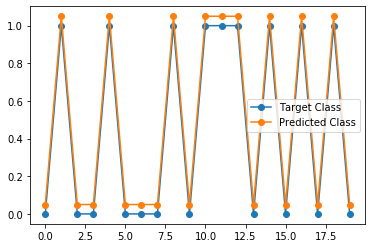

In [50]:
plt.plot(T, 'o-')
plt.plot(Y_classes + 0.05, 'o-')
plt.legend(['Target Class', 'Predicted Class']);

## Real Data Set

Now download a dataset for a classification problem from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).  Choose one you find interesting.

Load the data into `numpy` arrays for `X` and `T`.  Use your `NeuralNetworkClassifier` to model the data.  Train on all of the data and calculate the number of samples that you correctly classify.  Compare the accuracy for several sizes of networks, numbers of epochs, and optimization algorithms.  Discuss what you find.  Are you able to model the data accurately?

# Grading

A3grader.py will be available soon.  Until it is, conduct your own tests of your code.

# Extra Credit

1. For the data set you have downloaded, randomly partition the data into about 80% for training and 20% for testing.  Discuss the percent of samples correctly classified for train and test partitions and how variations in netowrk size, epochs, and optimization algorithm effect the results.
2. Develop a new version of `optimizers.py`, `neuralnetworks.py` and your `NeuralNetworkClassifier` class that will run on a GPU using pytorch.  Add a keyword argument where neded called `use_gpu` that can be set to `True` to run on GPU.